## Problem Defination

Target: Energy kcal (calories)

Primary Features: Carbs, Protein, Fat

Optional Features: Fibre, Freesugar, Cholesterol, Calcium, food category

Goal: Build a model that predicts calories from macro data and corrects deviations from standard formula.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("foods.csv")
df.head()

,Food Items,Energy kcal,Carbs,Protein(g),Fat(g),Freesugar(g),Fibre(g),Cholestrol(mg),Calcium(mg)
0,Butternaan,300.0,50.0,7.0,10.0,2.0,2.0,15.0,50.0
1,Cupcake,200.0,30.0,2.0,8.0,20.0,0.5,20.0,20.0
2,Donuts,250.0,30.0,3.0,12.0,10.0,1.0,20.0,20.0
3,French Fries,312.0,41.0,3.4,15.0,0.3,3.8,0.0,20.0
4,Garlic Bread,200.0,25.0,4.0,10.0,1.0,1.0,10.0,30.0


In [3]:
df.shape

(1028, 9)

In [4]:
df.isnull().sum()

Food Items        0
Energy kcal       0
Carbs             0
Protein(g)        0
Fat(g)            0
Freesugar(g)      0
Fibre(g)          0
Cholestrol(mg)    0
Calcium(mg)       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Food Items      1028 non-null   object 
 1   Energy kcal     1028 non-null   float64
 2   Carbs           1028 non-null   float64
 3   Protein(g)      1028 non-null   float64
 4   Fat(g)          1028 non-null   float64
 5   Freesugar(g)    1028 non-null   float64
 6   Fibre(g)        1028 non-null   float64
 7   Cholestrol(mg)  1028 non-null   float64
 8   Calcium(mg)     1028 non-null   float64
dtypes: float64(8), object(1)
memory usage: 72.4+ KB


In [6]:
df.describe()

,Energy kcal,Carbs,Protein(g),Fat(g),Freesugar(g),Fibre(g),Cholestrol(mg),Calcium(mg)
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,234.396109,18.539475,4.784115,16.238317,8.813220,1.959883,25.686284,59.894329
std,186.581466,16.730920,3.479237,20.322553,12.319459,2.755564,44.742728,67.212037
min,6.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.840000,5.632500,2.100000,4.047500,1.160000,0.590000,0.000000,18.595000
50%,176.870000,12.250000,4.000000,9.270000,2.830000,1.325000,5.410000,40.795000
75%,312.912500,27.440000,6.645000,17.075000,11.857500,2.342500,33.422500,79.500000
max,839.330000,86.530000,21.550000,90.450000,85.570000,35.710000,345.880000,631.820000


In [7]:
df.drop(columns=['Food Items'],inplace=True)

### Target Analysis (column:- Energy kcal) : histogram, boxplot, mean/median, skewness, outliers.


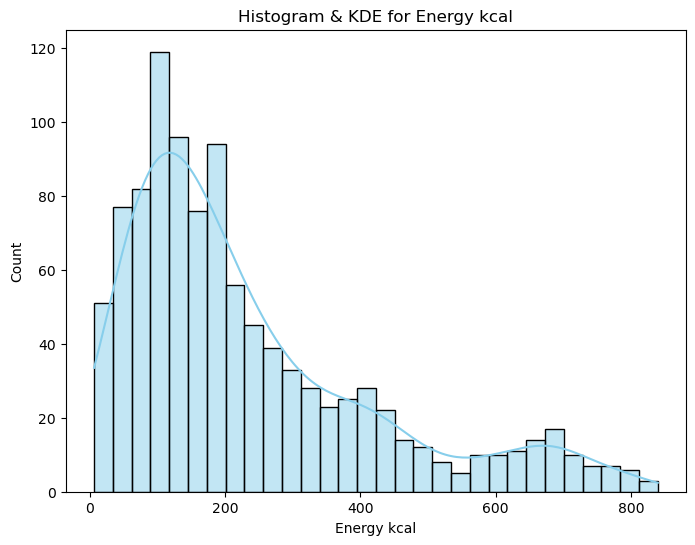

In [8]:
# Histogram + KDE
plt.figure(figsize=(8,6))
sns.histplot(df['Energy kcal'], kde=True, bins=30, color='skyblue')
plt.title(f"Histogram & KDE for Energy kcal")
plt.xlabel('Energy kcal')
plt.show()


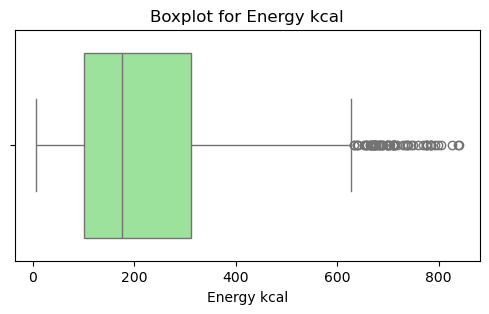

In [9]:
# Boxplot
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Energy kcal'], color='lightgreen')
plt.title(f"Boxplot for Energy kcal")
plt.show()

In [10]:
# # Skewness
# from scipy.stats import skew

# skew_val = skew(df['Energy kcal'].dropna())
# print(f"Skewness: {skew_val:.2f}")

######

# # Outliers using IQR
# Q1 = df['Energy kcal'].quantile(0.25)
# Q3 = df['Energy kcal'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5*IQR
# upper_bound = Q3 + 1.5*IQR
# outliers = df[(df['Energy kcal'] < lower_bound) | (df['Energy kcal'] > upper_bound)]['Energy kcal']
# print(f"Number of outliers: {len(outliers)}")

### Feature Analysis: histograms and boxplots for each numeric column

In [11]:
# exclude_cols = [Energy kcal']
df_filtered = df.drop(columns= ['Energy kcal'])

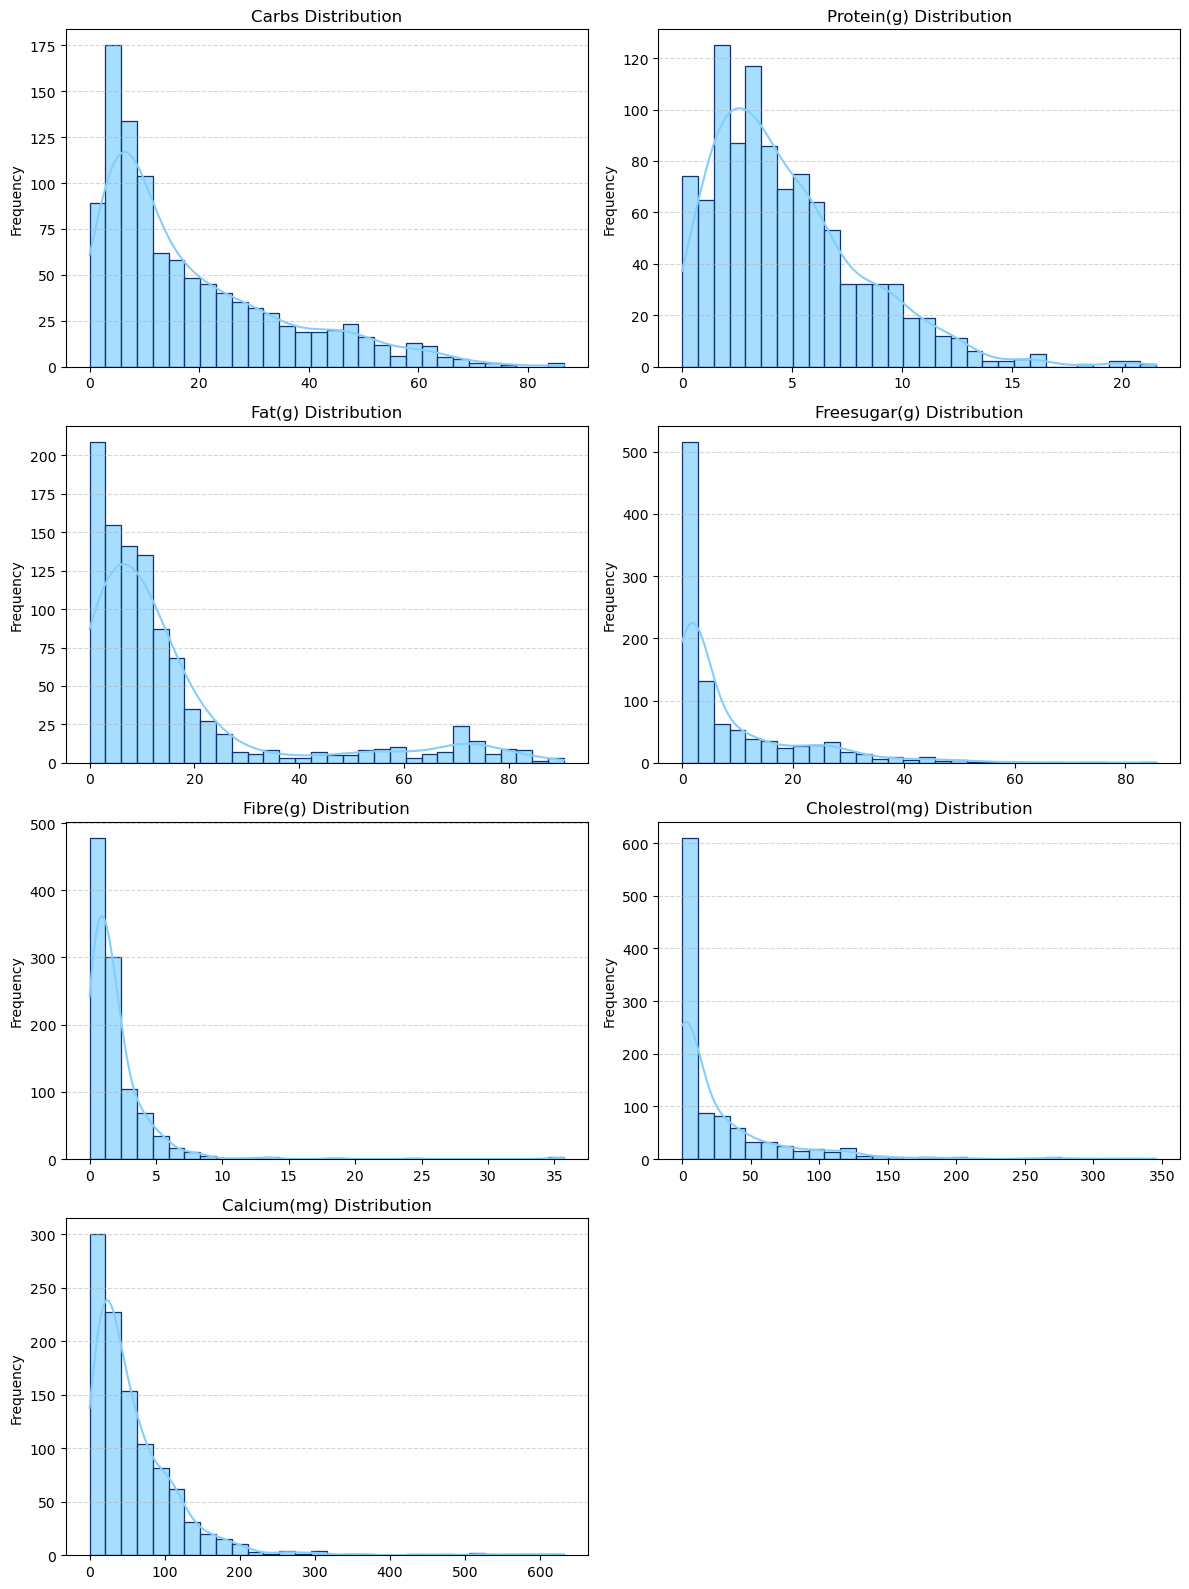

In [12]:
import math

# Columns to plot
cols = df_filtered.columns
num_cols = len(cols)

# Automatic grid layout
cols_per_row = 2  # Adjust as needed
rows = math.ceil(num_cols / cols_per_row)

plt.figure(figsize=(cols_per_row * 6, rows * 4))  # Dynamic figure size

# Loop through columns
for i, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, i)
    
    # Histogram + KDE
    sns.histplot(
        data=df_filtered, 
        x=col, 
        kde=True, 
        bins=30, 
        color="#82CFFD",  # nicer color
        edgecolor="#137", 
        alpha=0.7
    )
    
    plt.title(f'{col} Distribution', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.5)  # subtle gridlines

plt.tight_layout()
plt.show()


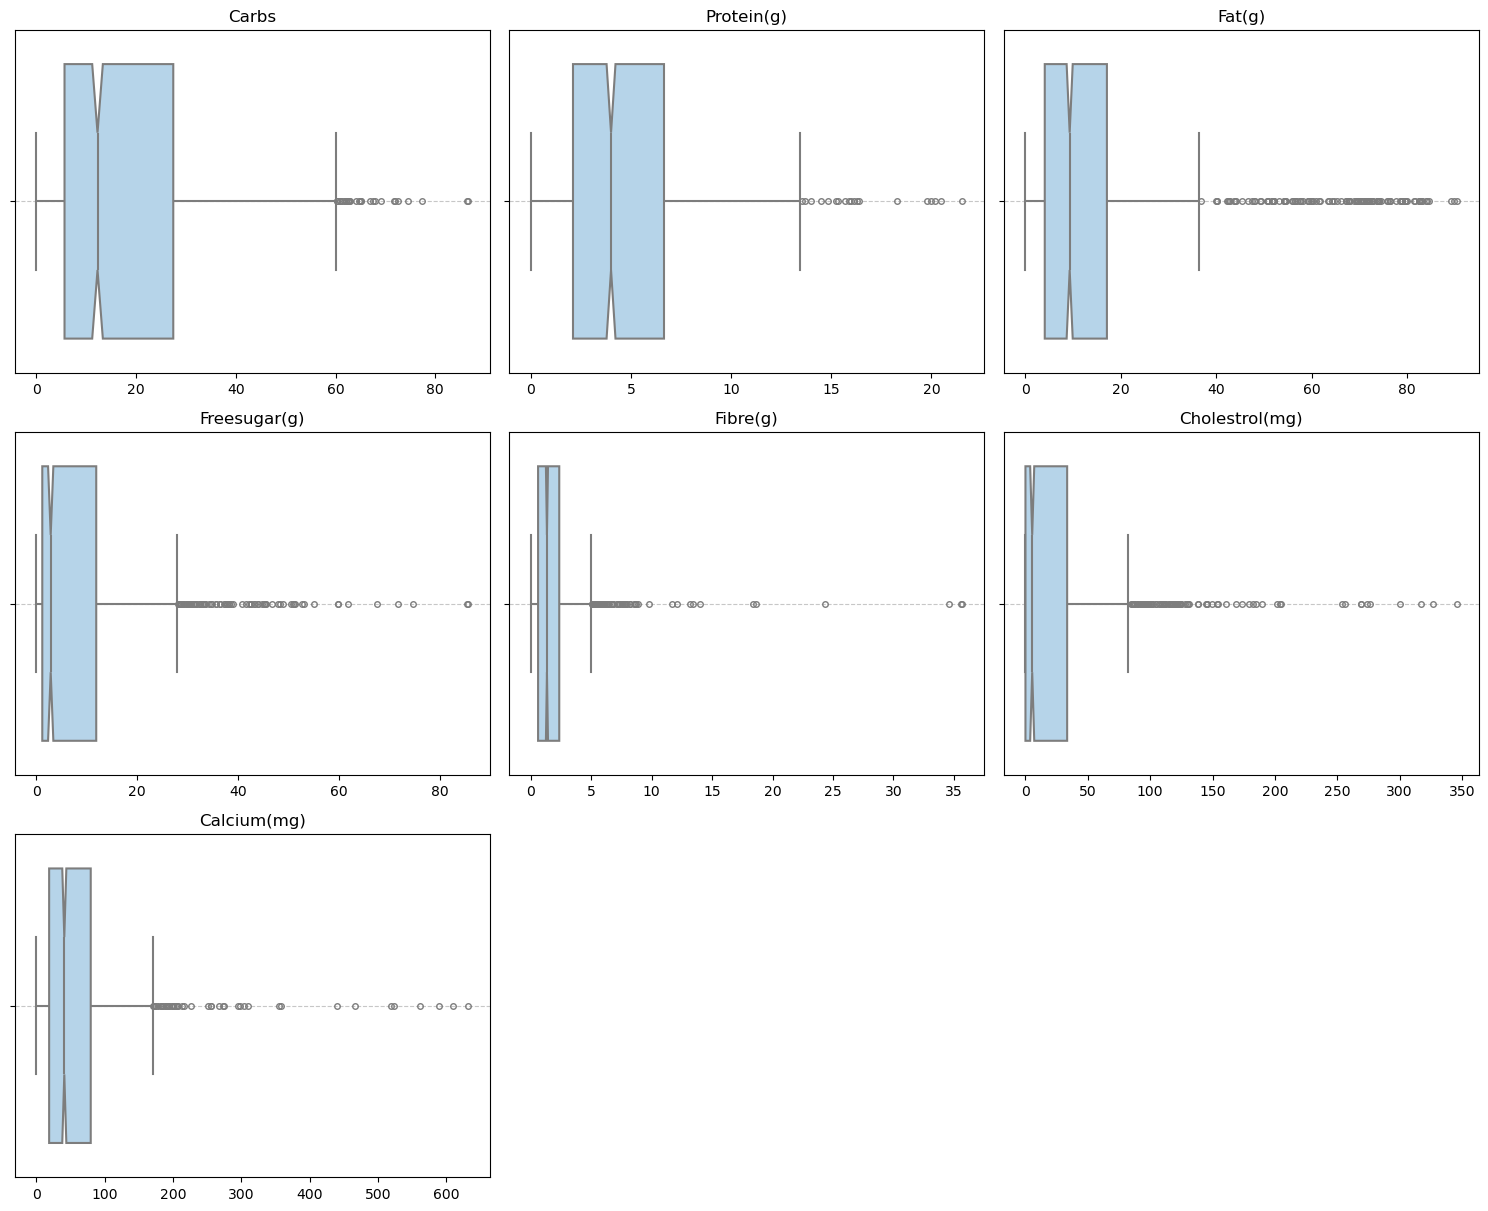

In [13]:
cols_per_row = 3  # Adjust as needed

plt.figure(figsize=(cols_per_row * 5, rows * 4))  # Dynamic figure size

# Loop through columns
for i, col in enumerate(df_filtered.columns, 1):
    plt.subplot(rows, cols_per_row, i)
    
    # Draw boxplot
    sns.boxplot(
        data=df_filtered, 
        x=col,
        color="#AED6F1",         # nicer color
        linewidth=1.5,           # thicker lines
        fliersize=4,             # smaller outlier points
        notch=True               # add notch to show confidence interval
    )
    
    # Add title and rotate x-labels if needed
    plt.title(col, fontsize=12)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # subtle horizontal grid lines

plt.tight_layout()
plt.show()

### Correlation Matrix

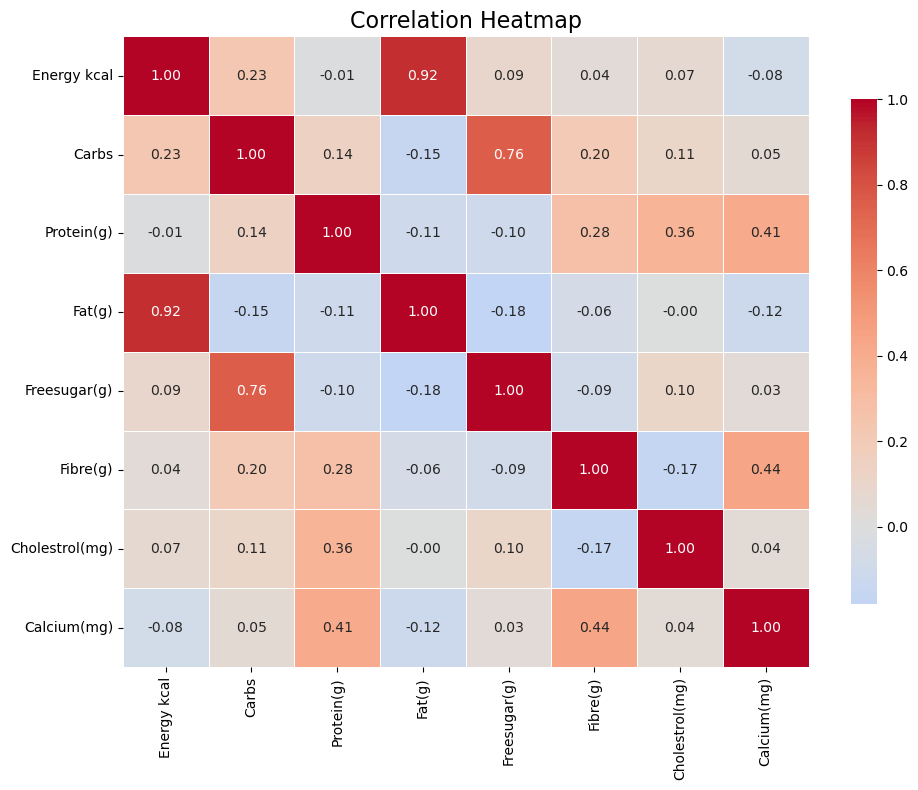

In [14]:
corr = df.select_dtypes(exclude='object').corr()

plt.figure(figsize=(10, 8))  # Adjust figure size

# Plot heatmap
sns.heatmap(
    corr, 
    annot=True,             # show correlation values
    fmt=".2f",              # 2 decimal places
    cmap="coolwarm",        # color palette
    center=0,               # center the colormap at 0
    linewidths=0.5,         # lines between cells
    cbar_kws={'shrink': 0.8}  # colorbar size
)

plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

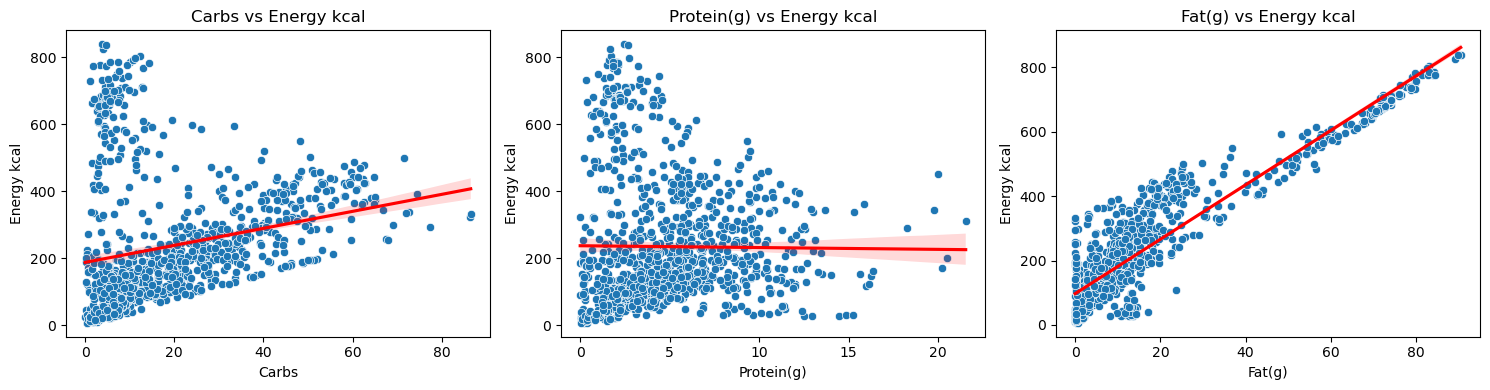

In [15]:
# Scatter plots with regression line
# Three main features that responsible for calories(kcal)
plt.figure(figsize=(15, 4))

features = ['Carbs', 'Protein(g)', 'Fat(g)']
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df[feature], y=df['Energy kcal'])
    sns.regplot(x=df[feature], y=df['Energy kcal'], scatter=False, color='red')
    plt.title(f'{feature} vs Energy kcal')

plt.tight_layout()
plt.show()

## Derived Features

In [16]:
# added two new features predicted_kcal and residuals
df["Predicted_kcal"] = (4*df["Carbs"] + 4*df["Protein(g)"] + 9*df["Fat(g)"]).round(2)
df["residuals"] = (df["Energy kcal"] - df["Predicted_kcal"]).round(2)
df

,Energy kcal,Carbs,Protein(g),Fat(g),Freesugar(g),Fibre(g),Cholestrol(mg),Calcium(mg),Predicted_kcal,residuals
0,300.00,50.00,7.00,10.00,2.00,2.00,15.0,50.00,318.00,-18.00
1,200.00,30.00,2.00,8.00,20.00,0.50,20.0,20.00,200.00,0.00
2,250.00,30.00,3.00,12.00,10.00,1.00,20.0,20.00,240.00,10.00
3,312.00,41.00,3.40,15.00,0.30,3.80,0.0,20.00,312.60,-0.60
4,200.00,25.00,4.00,10.00,1.00,1.00,10.0,30.00,206.00,-6.00
...,...,...,...,...,...,...,...,...,...,...
1023,60.88,6.55,1.26,3.24,4.31,2.20,0.0,15.18,60.40,0.48
1024,91.21,6.32,1.98,6.55,3.04,5.08,0.0,54.31,92.15,-0.94
1025,176.07,31.85,0.97,6.01,30.02,1.49,0.0,25.34,185.37,-9.30
1026,33.07,6.48,0.91,0.30,4.68,1.90,0.0,15.33,32.26,0.81


In [17]:
df['residuals'].max()

26.36

In [18]:
df['residuals'].min()

-173.05

## Residulas analysis

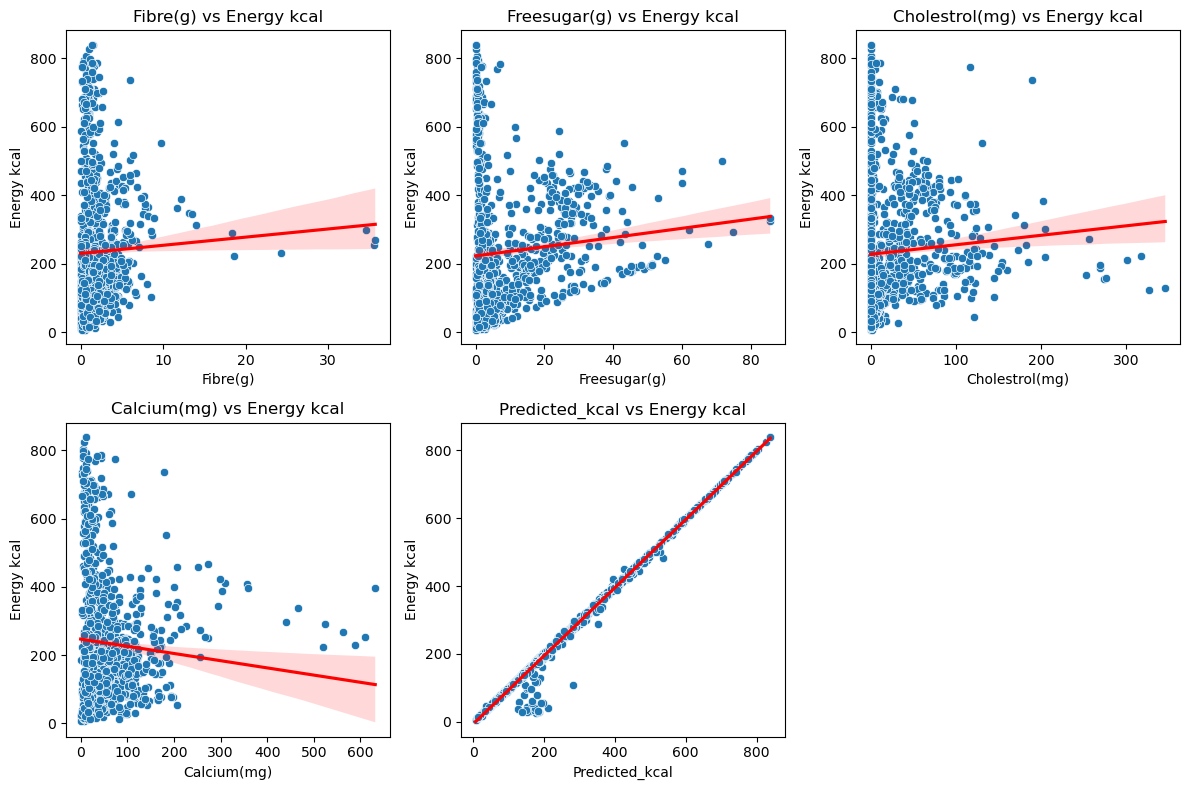

In [19]:
# some other features that might responsible for kcal and also predicted kcal vs original kcal
residuals_features = ["Fibre(g)", "Freesugar(g)", "Cholestrol(mg)", "Calcium(mg)", "Predicted_kcal"]
plt.figure(figsize=(12, 8))

for i, res_feature in enumerate(residuals_features):
    plt.subplot(2, 3, i + 1)  # 2 rows x 2 columns for 4 plots
    sns.scatterplot(x=df[res_feature], y=df['Energy kcal'])
    sns.regplot(x=df[res_feature], y=df['Energy kcal'], scatter=False, color='red')
    plt.title(f'{res_feature} vs Energy kcal')

plt.tight_layout()
plt.show()

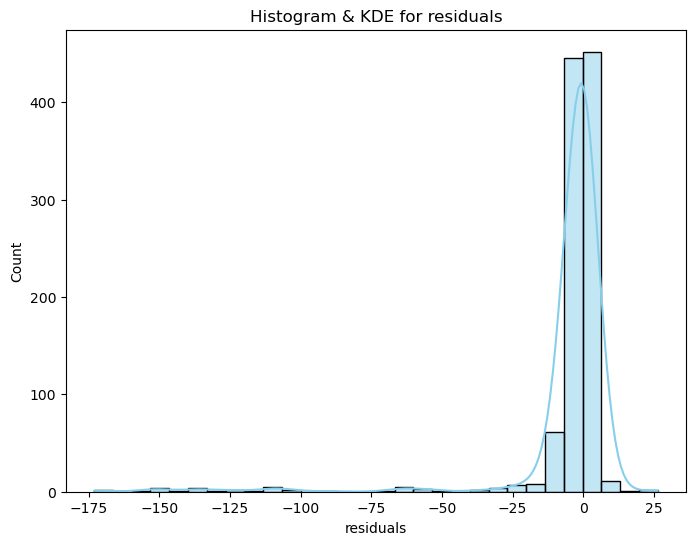

In [20]:
# Histogram + KDE for residuals
plt.figure(figsize=(8,6))
sns.histplot(df['residuals'], kde=True, bins=30, color='skyblue')
plt.title(f"Histogram & KDE for residuals")
plt.xlabel('residuals')
plt.show()


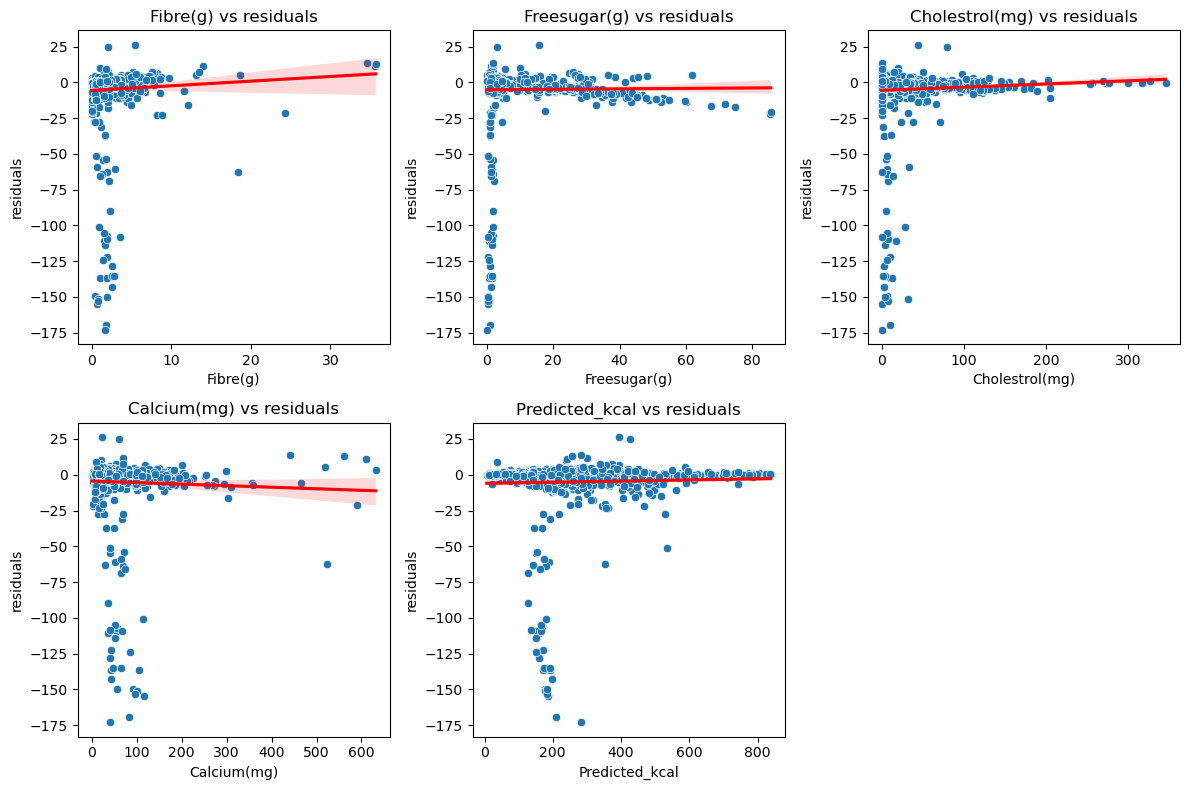

In [21]:
# other features v/s residuals

plt.figure(figsize=(12, 8))

for i, res_feature in enumerate(residuals_features):
    plt.subplot(2, 3, i + 1)  # 2 rows x 2 columns for 4 plots
    sns.scatterplot(x=df[res_feature], y=df['residuals'])
    sns.regplot(x=df[res_feature], y=df['residuals'], scatter=False, color='red')
    plt.title(f'{res_feature} vs residuals')

plt.tight_layout()
plt.show()

In [22]:
df.to_csv('kcal.csv',index=False)